In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../..')

%matplotlib inline
sns.set()

In [3]:
import glob

In [4]:
dataset = 'btc_30m_close.csv'

In [5]:
no_kaf = glob.glob('../../logs/btc_30m_close.csv/darnn_0_0/*/*')[0]
kaf_time = glob.glob('../../logs/btc_30m_close.csv//darnn_0_1/*/*')[0]
kaf_input = glob.glob('../../logs/btc_30m_close.csv//darnn_1_0/*/*')[0]
kaf_dual = glob.glob('../../logs/btc_30m_close.csv//darnn_1_1/*/*')[0]

In [6]:
df_no_kaf = pd.read_csv(no_kaf + '/train/results.csv')
df_kaf_time = pd.read_csv(kaf_time + '/train/results.csv')
df_kaf_input = pd.read_csv(kaf_input + '/train/results.csv')
df_kaf_dual = pd.read_csv(kaf_dual + '/train/results.csv')

In [7]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

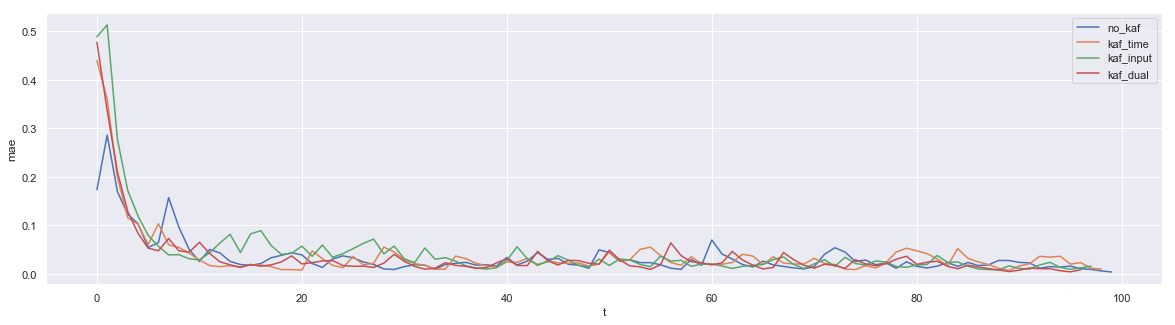

In [8]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

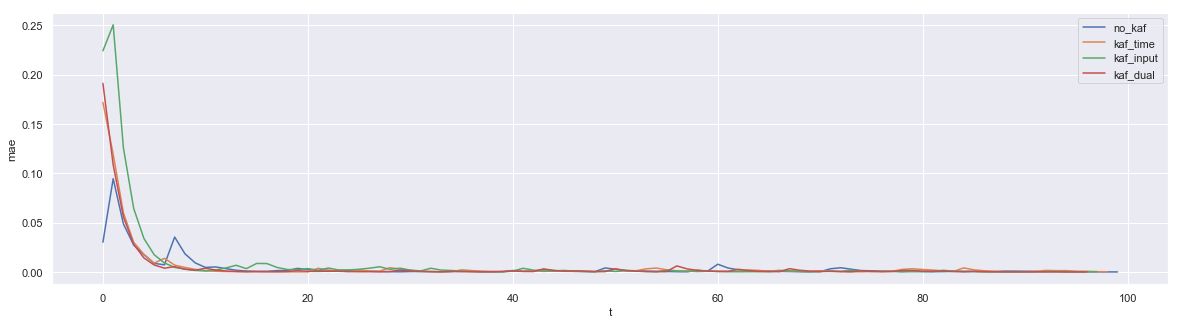

In [9]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf',
#             'dense', 
#             'seq2seq',
            'kaf_time','kaf_input', 'kaf_dual'])

In [10]:
df_no_kaf.insert(1, 'reg', value=np.zeros(len(df_no_kaf)))

In [11]:
# no reg
rows = ['no_kaf','kaf_time','kaf_input', 'kaf_dual']

table = pd.concat([df_no_kaf.mean(axis=0), 
                   df_kaf_time.mean(axis=0), 
                   df_kaf_input.mean(axis=0), 
                   df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

table.T

,loss,reg,norm,mse,mae,smape,rmse,mape
no_kaf,0.032444,0.000000,4.109165,0.003720,0.032444,0.068365,0.032444,22.175550
kaf_time,0.033777,0.001685,4.371209,0.003688,0.032093,0.068290,0.032093,7.251746
kaf_input,0.040083,0.003034,4.174733,0.006524,0.037049,0.079149,0.037049,10.295585
kaf_dual,0.030192,0.004445,3.452023,0.003120,0.025747,0.057693,0.025747,7.712679


In [15]:
header = table.index.tolist()

In [16]:
df_no_kaf = pd.read_csv(no_kaf + '/test/results.csv', header=None)
df_no_kaf.insert(1, 'reg', value=np.zeros(len(df_no_kaf)))
df_no_kaf.columns = header

In [17]:
df_kaf_time = pd.read_csv(kaf_time + '/test/results.csv', header=None)

In [18]:
#df_no_kaf = pd.read_csv(no_kaf + '/test/results.csv', names=header)
# df_dense = pd.read_csv(dense + '/test/results.csv', names=header)
# df_seq2seq = pd.read_csv(seq2seq + '/test/results.csv', names=header)
df_kaf_time = pd.read_csv(kaf_time + '/test/results.csv', names=header)
df_kaf_input = pd.read_csv(kaf_input + '/test/results.csv', names=header)
df_kaf_dual = pd.read_csv(kaf_dual+ '/test/results.csv', names=header)

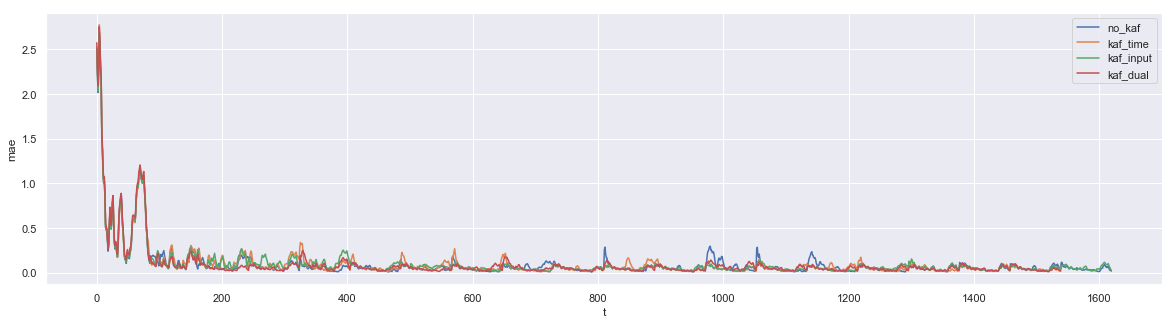

In [19]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
# ax.plot(smooth(df_dense.loss.values))
# ax.plot(smooth(df_seq2seq.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [20]:
# there is no regularization in no_kaf, dense, se2see the value in rmse is the smape!
table = pd.concat([df_no_kaf.mean(axis=0), 
#                    df_dense.mean(axis=0),
#                    df_seq2seq.mean(axis=0),
                   df_kaf_time.mean(axis=0), 
                   df_kaf_input.mean(axis=0), 
                   df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [21]:
# no reg
table.T

,loss,reg,norm,mse,mae,smape,rmse,mape
no_kaf,0.096161,0.000000,3.371535,0.056179,0.096161,0.154262,0.096161,30.158698
kaf_time,0.103722,0.002358,3.607303,0.058609,0.101364,0.160015,0.101364,30.280524
kaf_input,0.101721,0.003348,3.198134,0.055094,0.098373,0.160248,0.098373,31.426644
kaf_dual,0.096498,0.005109,2.310693,0.057282,0.091389,0.146357,0.091389,26.373913


In [22]:
def last_path(base_path):
    paths = glob.glob(base_path + '/report/*.csv')
    idxs = list(map(lambda x: int(x.split('/')[-1].split('_')[0]), paths))
    idx = max(idxs)
    paths
    return base_path + '/report/' + ''.join([str(idx), '_', 'report.csv'])

In [23]:
df_no_kaf = pd.read_csv(last_path(no_kaf), index_col=0)
# df_dense = pd.read_csv(last_path(dense), index_col=0)
# df_seq2seq = pd.read_csv(last_path(seq2seq), index_col=0)
df_kaf_time = pd.read_csv(last_path(kaf_time), index_col=0)
df_kaf_input = pd.read_csv(last_path(kaf_input), index_col=0)
df_kaf_dual = pd.read_csv(last_path(kaf_dual), index_col=0)

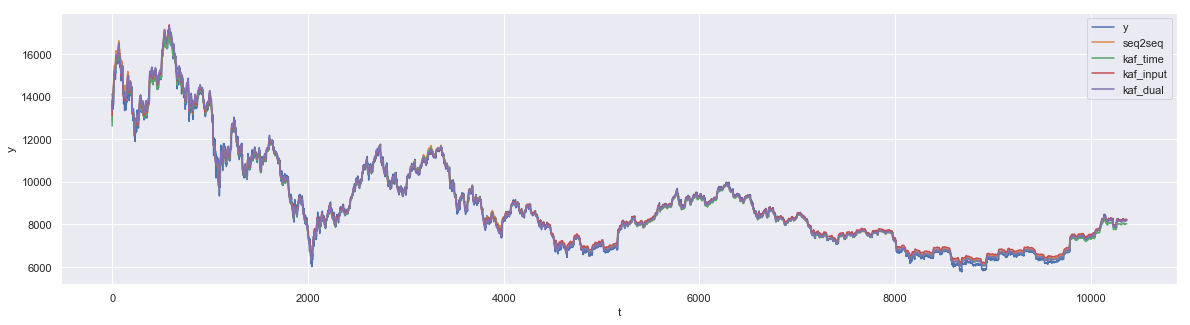

In [24]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
# ax.plot(df_dense.y_hat.values)
# ax.plot(df_seq2seq.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['y',
#             'no_kaf','dense', 
            'seq2seq','kaf_time','kaf_input', 'kaf_dual'])

In [25]:
from ntsa.utils.misc import regr_metrics

In [26]:
y = df_no_kaf.y.values
y_no_kaf = df_no_kaf.y_hat.values
# y_dense = df_dense.y_hat.values
# y_seq2seq = df_seq2seq.y_hat.values
y_kaf_time = df_kaf_time.y_hat.values
y_kaf_input = df_kaf_input.y_hat.values
y_kaf_dual = df_kaf_dual.y_hat.values

In [27]:
metrics = [
list(regr_metrics(y, y_no_kaf).values()),
# list(regr_metrics(y, y_dense).values()),
# list(regr_metrics(y, y_seq2seq).values()),
list(regr_metrics(y, y_kaf_time).values()),
list(regr_metrics(y, y_kaf_input).values()),
list(regr_metrics(y, y_kaf_dual).values())
]

In [28]:
# no reg
pd.DataFrame(np.array(metrics), index=['no_kaf',
#                                        'dense',
#                                        'seq2seq',
                                       'time', 'input', 'dual'], columns=['mse', 'mae', 'smape', 'mape'])

,mse,mae,smape,mape
no_kaf,22787.196732,110.327439,0.012749,1.267225
time,18499.744265,102.248994,0.011648,1.164233
input,29187.861023,131.547293,0.015921,1.575076
dual,20173.768906,97.681391,0.010756,1.071532
